In [22]:
from scipy.io import loadmat
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time
from matplotlib.patches import Rectangle
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
import ot 
from itertools import combinations 

from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances


from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
import os

In [2]:
#Amazon
A_surf = loadmat('surf/amazon.mat')
X_a_surf = A_surf['fts']
Y_a_surf = A_surf['labels']

#Caltech
C_surf = loadmat('surf/caltech10.mat')
X_c_surf = C_surf['fts']
Y_c_surf = C_surf['labels']

# Webcam
W_surf = loadmat('surf/webcam.mat')
X_w_surf = W_surf['fts']
Y_w_surf = W_surf['labels']

# Dslr
D_surf = loadmat('surf/dslr.mat')
X_d_surf = D_surf['fts']
Y_d_surf = D_surf['labels']


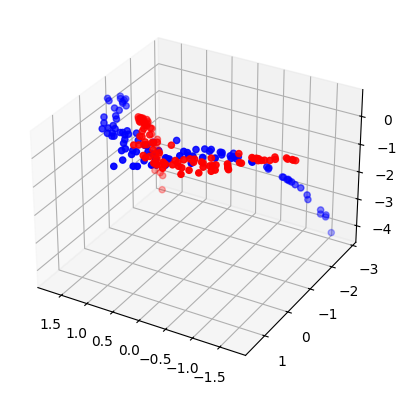

In [3]:
x_start, y_start, z_start= 0, 0, 0
scaling_factor = -1.0
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
scaler = StandardScaler()

np.random.seed(42)
random.seed(42)
S_mean = [2, 5,7]
Smatrix=np.array([[1, 0, -2], 
          [0, 1, 0.5], 
          [-2,0.5,1]])
S_cov  = Smatrix@Smatrix
S= np.random.multivariate_normal(S_mean, S_cov, 100)
S=scaler.fit_transform(S)

np.random.seed(20)
random.seed(20)
x =np.linspace(-3,3,100)
y=2-3*x-3*x**2+np.random.normal(0,2,size=100)
z=1-0.5*x*y-x**2+y**3+np.random.normal(0,2,size=100)
S= np.column_stack((x,y,z))
S=scaler.fit_transform(S)

np.random.seed(20)
random.seed(20)
x =np.linspace(-3,3,100)
y=2+3*x+-3*x**2+np.random.normal(0,3,size=100)
z=1-5*x*y-y**2+np.random.laplace(0,2,size=100)
T= np.column_stack((x,y,z))
T=scaler.fit_transform(T)

pca = PCA(n_components=2, svd_solver='full')
pca.fit(S)
eigenvectors_S=pca.components_
S_transform=pca.transform(S)
S_projected=eigenvectors_S.T@S_transform.T

pca = PCA(n_components=2, svd_solver='full')
pca.fit(T)
eigenvectors_T=pca.components_
T_transform=pca.transform(T)
T_projected=eigenvectors_T.T@T_transform.T

eigenvector_x_S1 = x_start + scaling_factor * eigenvectors_S[0][0]
eigenvector_y_S1 = y_start + scaling_factor * eigenvectors_S[0][1]
eigenvector_z_S1 = z_start + scaling_factor * eigenvectors_S[0][2]

eigenvector_x_S2 = x_start + scaling_factor * eigenvectors_S[1][0]
eigenvector_y_S2 = y_start + scaling_factor * eigenvectors_S[1][1]
eigenvector_z_S2 = z_start + scaling_factor * eigenvectors_S[1][2]

eigenvector_x_T1 = x_start + scaling_factor * eigenvectors_T[0][0]
eigenvector_y_T1 = y_start + scaling_factor * eigenvectors_T[0][1]
eigenvector_z_T1 = z_start + scaling_factor * eigenvectors_T[0][2]

eigenvector_x_T2 = x_start + scaling_factor * eigenvectors_T[1][0]
eigenvector_y_T2 = y_start + scaling_factor * eigenvectors_T[1][1]
eigenvector_z_T2 = z_start + scaling_factor * eigenvectors_T[1][2]


normal_vector_S = np.cross(eigenvectors_S[0], eigenvectors_S[1])
normal_vector_T = np.cross(eigenvectors_T[0], eigenvectors_T[1])

D = -np.dot(normal_vector_S, np.array([0, 0, 0]))  # Calculate D
Z_S = (-normal_vector_S[0] * X - normal_vector_S[1] * Y - D) / normal_vector_S[2]

D = -np.dot(normal_vector_T, np.array([0, 0, 0]))  # Calculate D
Z_T = (-normal_vector_T[0] * X - normal_vector_T[1] * Y - D) / normal_vector_T[2]

ax = plt.axes(projection='3d')
ax.scatter3D(S[:,0], S[:,1], S[:,2],c="red")
ax.scatter3D(T[:,0], T[:,1], T[:,2],c="blue")
ax.view_init(30,120)
plt.show()

In [70]:
def plot_arrow(ax,eigenvectors, origin, color='b', arrow_length_ratio=0.1):
    origin = np.array(origin)
    for row in eigenvectors:
        ax.quiver(origin[0],origin[1],origin[2], row[0],row[1], row[2], color=color, arrow_length_ratio=arrow_length_ratio)
        ax.scatter3D(row[0],row[1], row[2], c=color, alpha=0.01)



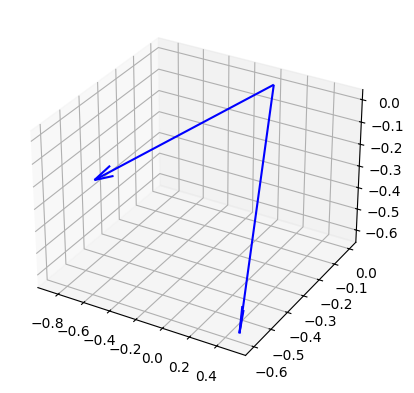

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_arrow(ax,eigenvectors_S, [0,0,0])

In [31]:
type(X)

numpy.ndarray

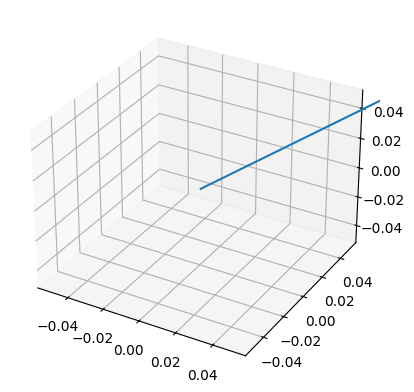

In [16]:
# Direction of the Arrows (vectors)
u = 3
v = 7
w = 1
 
fig = plt.figure()
ax = plt.axes(projection = "3d")
 
q = ax.quiver(0,0,0,u,v,w , arrow_length_ratio=0.2)
plt.show()